In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from qpath.base import * 
from qpath.stain import *
from pathlib import Path

In [3]:
import matplotlib.pylab as plt

In [4]:
path = Path('/teradata/data/COAD/colobiome_histopath/SB001-T01-01-HE')
path_pyr = path / 'slide/pyramid.zarr'

In [5]:
wsi_info = WSIInfo(path_pyr)

In [6]:
wsi_info.info

{'background': 'FFFFFF',
 'objective_power': 20,
 'resolution_units': 'microns',
 'resolution_x_level_0': 0.23387573964497,
 'resolution_y_level_0': 0.234330708661417,
 'vendor': 'mirax',
 'pyramid': [{'downsample_factor': 1,
   'height': 111388,
   'level': 0,
   'width': 75829},
  {'downsample_factor': 2, 'height': 55694, 'level': 1, 'width': 37914},
  {'downsample_factor': 4, 'height': 27847, 'level': 2, 'width': 18957},
  {'downsample_factor': 8, 'height': 13923, 'level': 3, 'width': 9478},
  {'downsample_factor': 16, 'height': 6961, 'level': 4, 'width': 4739},
  {'downsample_factor': 32, 'height': 3480, 'level': 5, 'width': 2369},
  {'downsample_factor': 64, 'height': 1740, 'level': 6, 'width': 1184},
  {'downsample_factor': 128, 'height': 870, 'level': 7, 'width': 592},
  {'downsample_factor': 256, 'height': 435, 'level': 8, 'width': 296},
  {'downsample_factor': 512, 'height': 217, 'level': 9, 'width': 148}]}

In [7]:
wsi = MRI(path_pyr)

In [11]:
p6 = wsi.get_plane(6)

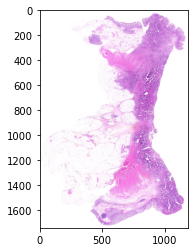

In [13]:
plt.imshow(p6)

In [13]:
img = wsi.get_region_px(13000, 14000, 1024, 1024, 2)

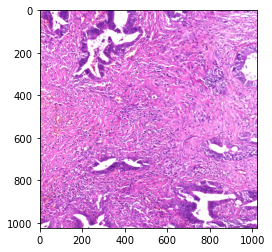

In [14]:
plt.imshow(img)

In [28]:
img_he1 = rgb2he(img)

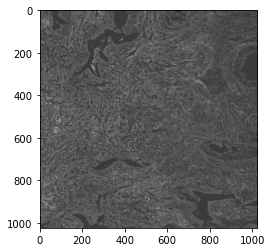

In [29]:
plt.imshow(img_he1[1])
plt.gray()

In [10]:
nrm = VahadaneNormalizer()

In [31]:
p2 = wsi.get_plane(2)

In [35]:
nrm.fit(p2)

In [16]:
img2 = nrm.apply(img)

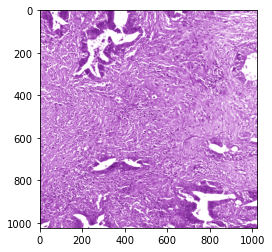

In [17]:
plt.imshow(img2)

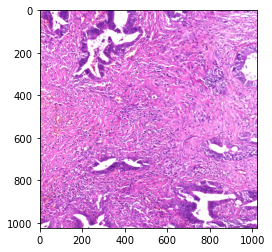

In [18]:
plt.imshow(img)

In [8]:
img0 = wsi.get_region_px(40000,14000,20000,50000,0)

In [11]:
nrm.fit(img0)

In [12]:
nrm.save("stain-norm-vahadane-model_SB001_01.npz")

In [15]:
img2 = nrm.apply(img)

In [19]:
from skimage.io import imsave

In [22]:
imsave("stain-norm-vahadane-template.tiff", img0)